# Keras  Implementation of Capsule Networks and CNN on MNIST Digits Dataset

In this demo we will build both capsule and convolutional neural network model for recognizing handwritten digits.
### Chapters

####   1. Intro to CNN and Capsule Network
####   2. Steps of building capsule network
####    3. Importing the dependencies
####   4. Loading and Reshaping the mnist dataset
####   5. Building CNN and CapsNet models
####   5.1 Training, Saving and Testing a CNN model
####   5.2 Training, Saving and Testing a Capsnet Model


## 1. Intro to  CNN and Capsule Network

##### What is convolution?
In purely mathematical terms, convolution is a function derived from two given functions by integration which expresses how the shape of one is modified by the other.

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. Unlike CNN, A capsule is a group of neurons which uses vectors to represent an object or object part. Length of a vector represents presence of an object and orientation of vector represents its pose(size, position, orientation, etc). Group of these capsules forms a capsule layer and then these layers lead to form a capsule network.

[References](https://arxiv.org/pdf/1710.09829.pdf)


##  2. Steps of Building Capsule Networks

#### Step One : Initial Convolutional Layer  
 This layer uses convolution to get low level features from image and pass them to the next layer of the network (a primary capsule layer).
#### Step Two: Primary Capsule Layer
A primary capsule layer reshapes output from  the previous layer (convolution layer) into capsules containing vectors of equal dimension. Length of each of these vector represents the probability of presence of an object.
#### Step Three: Digit Capsule Layer
#### Step Four:  Decorder Network
A decoder network reconstructs the original image using an output of digit capsule layer. 

## 3. Importing the dependencies

In [1]:
import keras
from keras.models import Model
from keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
from keras import initializers
from keras.utils import to_categorical
from keras.layers.core import Activation

Using TensorFlow backend.


## 4.  Loading and Reshaping the MNIST Data

MNIST data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

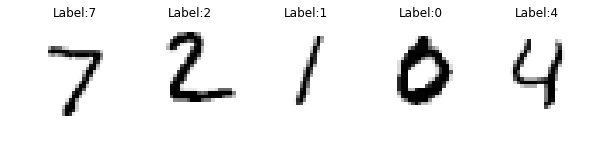

In [2]:
# download training and test data from mnist and reshape it


(x_train, y_orig_train), (x_test, y_orig_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(-1,28,28,1)
y_train = np.array(to_categorical(y_orig_train.astype('float32')))

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(-1,28,28,1)
y_test = np.array(to_categorical(y_orig_test.astype('float32')))

x_output = x_train.reshape(-1,784)
X_valid_output = x_test.reshape(-1,784)

n_samples = 5

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = x_test[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_orig_test[index]))
    plt.axis("off")

plt.show()

## 5. Building  Models

### 5.1 CNN Model 

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### 5.11 CNN Training

In [7]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
# You can play around with number of epochs
# YOUR ACCURACY MAY ALSO BE HIGHER THAN WHAT IS SHOWN HERE 
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0060 - acc: 0.9983
Epoch 2/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0062 - acc: 0.9984
Epoch 3/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.0049 - acc: 0.9985
Epoch 4/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0039 - acc: 0.9990
Epoch 5/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.0029 - acc: 0.9991
Epoch 6/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0028 - acc: 0.9992
Epoch 7/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0024 - acc: 0.9994
Epoch 8/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0021 - acc: 0.9995
Epoch 9/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0020 - acc: 0.9995
Epoch 10/10
60000/60000 [==============================] - 23s 384us/step - loss: 

#### 5.1.2 Displaying mode architecture

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### 5.1.3  Evaluation of CNN model

In [17]:
model.metrics_names

['loss', 'acc']

In [19]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 52us/step


[0.10661012429856077, 0.9865]

In [33]:
#Saving the model
model.save('mnist_cnn.h5')

## 5.2 Capsule Network
### Step 1: Initial Convolutional Layer
##### Description of Convolutional Layer Architecture
    Number of Filters = 256
    Size of each filters = 9x9 
    Stride =  1 
    Activation Func:  ReLu 
    Input size of image = 28x28
    Output size = 20x20x256

In [3]:
input_shape = Input(shape=(28,28,1))  # size of input image is 28*28
 
# a convolution layer output shape = 20*20*256
conv1 = Conv2D(256, (9,9), activation = 'relu', padding = 'valid')(input_shape)

### Step 2: Primary Capsule Layer
##### Description of Primary Capspule Layer Architecture
The output from the previous layer is being passed to 256 filters.

    Number of Filters = 256
    Size of each Filter = 9x9
    Sride = 2
    Output Size = 6x6x256.
The output is then reshaped into 8-dimensional vector. So shape will be 6x6x32 capsules each of which will be 8-dimensional. Then it will pass through a non-linear function(squash) so that length of output vector can be maintained between 0 and 1.

In [4]:
# convolution layer with stride 2 and 256 filters of size 9*9
conv2 = Conv2D(256, (9,9), strides = 2, padding = 'valid')(conv1)
 
# reshape into 1152 capsules of 8 dimensional vectors
reshaped = Reshape((6*6*32,8))(conv2)
 
def squash(inputs):
    # take norm of input vectors
    squared_norm = K.sum(K.square(inputs), axis = -1, keepdims = True)
 
    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs

# squash the reshaped output to make length of vector b/w 0 and 1
squashed_output = Lambda(squash)(reshaped)

### Step 3: Digit Capsule Layer
##### Description of Digit Capsule Layer Architecture

    Input size = 1152x8
    Output size = 10x16
    
Where 10 capsules each represents an output class with 16 dimensional vector. Then each of these 10 capsules are converted into single value to predict the output class using a lambda layer.


In [5]:
class DigitCapsuleLayer(Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')
    
    def build(self, input_shape): 
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [10, 6*6*32, 16, 8], initializer = self.kernel_initializer, name = 'weights')
        self.built = True
    
    def call(self, inputs):
        inputs = K.expand_dims(inputs, 1)
        inputs = K.tile(inputs, [1, 10, 1, 1])
        # matrix multiplication b/w previous layer output and weight matrix
        inputs = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs)
        b = tf.zeros(shape = [K.shape(inputs)[0], 10, 6*6*32])
        
# routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, dim=1)
            s = K.batch_dot(c, inputs, [2, 2])
            v = squash(s)
            b = b + K.batch_dot(v, inputs, [2,3])
            
        return v 
    def compute_output_shape(self, input_shape):
        return tuple([None, 10, 16])
    
    
    
def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())
 
digit_caps = DigitCapsuleLayer()(squashed_output)
outputs = Lambda(output_layer)(digit_caps)

Instructions for updating:
dim is deprecated, use axis instead


#### Step 4:  Decoder Network

The purpose of  decoder network trying to reconstruct the input image. 

    Input Size = 10x16 (digit capsule layer output)
    
The decorder network will reconstruct back the original image of size 28x28. 

##### Number of nodes in each  dense layer of decorder network

    Dense layer 1 = 512 nodes
    Dense layer 2 = 1024
    Dense layer 3 = 784
    

In [6]:
def mask(outputs):
 
    if type(outputs) != list:  # mask at test time
        norm_outputs = K.sqrt(K.sum(K.square(outputs), -1) + K.epsilon())
        y  = K.one_hot(indices=K.argmax(norm_outputs, 1), num_classes = 10)
        y = Reshape((10,1))(y)
        return Flatten()(y*outputs)
 
    else:    # mask at train time
        y = Reshape((10,1))(outputs[1])
        masked_output = y*outputs[0]
        return Flatten()(masked_output)
    
inputs = Input(shape = (10,))
masked = Lambda(mask)([digit_caps, inputs])
masked_for_test = Lambda(mask)(digit_caps)
 
decoded_inputs = Input(shape = (16*10,))
dense1 = Dense(512, activation = 'relu')(decoded_inputs)
dense2 = Dense(1024, activation = 'relu')(dense1)
decoded_outputs = Dense(784, activation = 'sigmoid')(dense2)
decoded_outputs = Reshape((28,28,1))(decoded_outputs)

### Step 5: Defining the Loss Functions and Training of model
Defined function below is a probabilistic loss function used for classifying digits image.

In [ ]:
# Probabilitic loss function

In [7]:
def loss_fn(y_true, y_pred):
 
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + 0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))
 
    return K.mean(K.sum(L, 1))

In [32]:
#Training the model

In [8]:
decoder = Model(decoded_inputs, decoded_outputs)
model = Model([input_shape,inputs],[outputs,decoder(masked)])
test_model = Model(input_shape,[outputs,decoder(masked_for_test)])
 
m = 128
epochs = 10
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],metrics=['accuracy'])
model.fit([x_train, y_train],[y_train,x_train],batch_size = m, epochs = epochs, validation_data = ([x_test, y_test],[y_test,x_test]))
 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 777s 13ms/step - loss: 0.8138 - lambda_2_loss: 0.8137 - model_1_loss: 0.1379 - lambda_2_acc: 0.1206 - model_1_acc: 0.7906 - val_loss: 0.8095 - val_lambda_2_loss: 0.8094 - val_model_1_loss: 0.0679 - val_lambda_2_acc: 0.1009 - val_model_1_acc: 0.8030
Epoch 2/10
60000/60000 [==============================] - 782s 13ms/step - loss: 0.8095 - lambda_2_loss: 0.8094 - model_1_loss: 0.0674 - lambda_2_acc: 0.0992 - model_1_acc: 0.8036 - val_loss: 0.8095 - val_lambda_2_loss: 0.8094 - val_model_1_loss: 0.0676 - val_lambda_2_acc: 0.1009 - val_model_1_acc: 0.8034
Epoch 3/10
60000/60000 [==============================] - 758s 13ms/step - loss: 0.8095 - lambda_2_loss: 0.8094 - model_1_loss: 0.0673 - lambda_2_acc: 0.0991 - model_1_acc: 0.8036 - val_loss: 0.8095 - val_lambda_2_loss: 0.8094 - val_model_

KeyboardInterrupt: 

In [ ]:
#### 5.2.2 Evaluation of capsule network model 

In [ ]:
# Prediction 

In [12]:
label_predicted, image_predicted = model.predict([x_test, y_test])

In [ ]:
# Testing

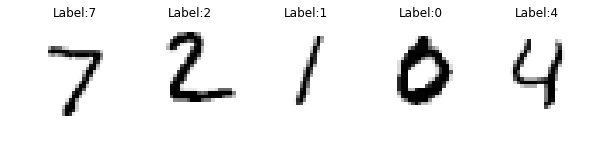

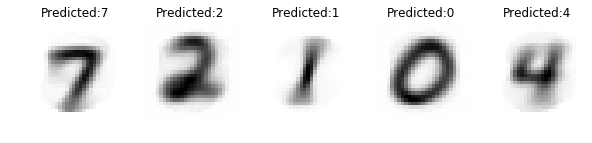

In [13]:
n_samples = 5

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = x_test[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_orig_test[index]))
    plt.axis("off")

plt.show()

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = image_predicted[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Predicted:" + str(np.argmax(label_predicted[index])))
    plt.axis("off")

plt.show()

In [28]:
#Saving the model
model.save('mnist_capsnet.h5')

In [10]:
#Loading the model

from keras.models import load_model
# Assuming your model includes instance of an "AttentionLayer" class
model = load_model('mnist_capsnet.h5', custom_objects={'DigitCapsuleLayer': DigitCapsuleLayer,'loss_fn':loss_fn})